# Analyzing the OpenML data

This notebook is ought to give us a better understanding of the datasets. For exercise 0, we need to find two <b>classification</b> datasets with varying sample and dimension sizes, as well as different attribute types (numerical, categorical, ...).

Valid sources for the datasets include OpenML and UCI ML Repository. For OpenML I found an easy to use library to get an idea of what types of datasets we are dealing with.

In [4]:
import openml
from matplotlib import pyplot as plt

Let's first get an overview of the Datasets List that the library provides. As this is a classification exercise, we're only interested in datasets that provide us with classes, i. e. the "NumberOfClasses" count being at least 2 (e. g. positive vs. negative). Thus we'll only be keeping data that passes this filter

Interesting columns include "NumberOfFeatures" and "NumberOfInstances". We can also see that "NumberOfClasses" provides 

In [3]:
openml.datasets.list_datasets(output_format="dataframe")

,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
2,2,anneal,1,1,active,ARFF,684.0,7.0,8.0,5.0,39.0,898.0,898.0,22175.0,6.0,33.0
3,3,kr-vs-kp,1,1,active,ARFF,1669.0,3.0,1527.0,2.0,37.0,3196.0,0.0,0.0,0.0,37.0
4,4,labor,1,1,active,ARFF,37.0,3.0,20.0,2.0,17.0,57.0,56.0,326.0,8.0,9.0
5,5,arrhythmia,1,1,active,ARFF,245.0,13.0,2.0,13.0,280.0,452.0,384.0,408.0,206.0,74.0
6,6,letter,1,1,active,ARFF,813.0,26.0,734.0,26.0,17.0,20000.0,0.0,0.0,16.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44252,44252,Meta_Album_MD_5_BIS_Micro,1,30980,active,arff,NaN,NaN,NaN,0.0,39.0,800.0,0.0,0.0,24.0,1.0
44253,44253,Meta_Album_PNU_Micro,1,30980,active,arff,40.0,NaN,40.0,19.0,3.0,760.0,760.0,760.0,1.0,0.0
44254,44254,Meta_Album_DOG_Micro,1,30980,active,arff,40.0,NaN,40.0,19.0,3.0,760.0,760.0,760.0,1.0,0.0
44255,44255,Meta_Album_MED_LF_Micro,1,30980,active,arff,40.0,NaN,40.0,20.0,3.0,800.0,800.0,800.0,1.0,0.0


In [15]:
ds = openml.datasets.list_datasets(output_format="dataframe")
ds = ds[ds["NumberOfClasses"]>=2]

Having a first look at the datasets, we can see something that appears like a Feature Counts vs. Sample Size tradeoff when it comes to picking our datasets.

One initial proposal could be to have one of the datasets be one right to the 45° diagonal that shows in the graph as a red line.

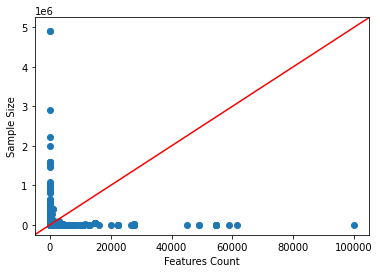

In [23]:
fig, ax = plt.subplots()
ax.scatter(ds["NumberOfFeatures"], ds["NumberOfInstances"])
_ = ax.set_xlabel("Features Count")
_ = ax.set_ylabel("Sample Size")
_ = ax.axline([0, 0], [100000, 5000000], color="r")

A much more useful view at our data is to see it be transformed to log space. This gives our data a much nicer distribution and allows us to more easily distinguish the feature and count differences from one another.

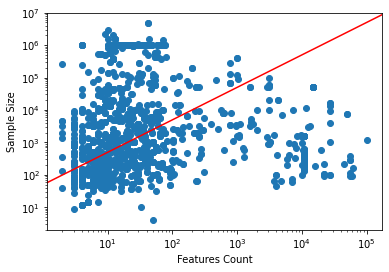

In [24]:
fig, ax = plt.subplots()
ax.scatter(ds["NumberOfFeatures"], ds["NumberOfInstances"])
_ = ax.set_xlabel("Features Count")
_ = ax.set_ylabel("Sample Size")
_ = ax.set_xscale("log")
_ = ax.set_yscale("log")
_ = ax.axline([0, 0], [100000, 5000000], color="r")

I propose subdividing what we see in four areas like this:

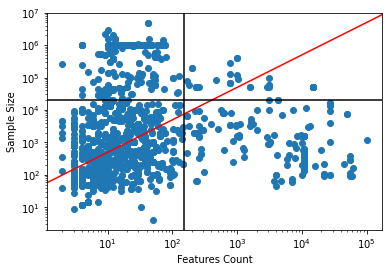

In [41]:
fig, ax = plt.subplots()
ax.scatter(ds["NumberOfFeatures"], ds["NumberOfInstances"])
_ = ax.set_xlabel("Features Count")
_ = ax.set_ylabel("Sample Size")
_ = ax.set_xscale("log")
_ = ax.set_yscale("log")
_ = ax.axline([0, 0], [100000, 5000000], color="r")
_ = ax.axvline(150, color="black")
_ = ax.axhline(20000, color="black")

My proposal is to pick two datasets like the following:

EITHER<br>
Dataset 1: from bottom left partition, Dataset 2: from upper right partition<br>
OR<br>
Dataset 1: from upper left partition, Dataset 2: from bottom right partition

Furthermore, we need to be careful to make sure that:

EITHER<br>
Dataset 1 consists of mostly numerical features, Dataset 2 consists of mostly categorical features<br>
OR<br>
Dataset 1 consists of mostly categorical features, Dataset 2 consists of mostly numerical features.